In [12]:
using Printf, LinearAlgebra, Plots

In [13]:
a,b = 0,π
t_min, t_max = 0,1

α = 2*π
h = π/10
k = 0.05

xn = Int((b-a)/h)
tn = Int((t_max-t_min)/k)
λ = k*α/h

cc_x0(t) = 0
cc_xn(t) = 0
ci_f(x) = sin(x)
ci_g(x) = 0


ci_g (generic function with 1 method)

In [14]:
di = fill(λ^2,xn-2)
d = fill(-2*λ^2 + 2,xn-1)
ds = fill(λ^2,xn-2)
A = Tridiagonal(di, d, ds)
A

9×9 Tridiagonal{Float64, Vector{Float64}}:
 0.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 1.0  0.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0  0.0  1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0  0.0  1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0  0.0  1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0  0.0  1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0  0.0  1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0  0.0  1.0
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0  0.0

In [15]:
x = LinRange(a,b,xn+1)
t = LinRange(t_min,t_max,tn+1)
display(x)
display(t)

11-element LinRange{Float64, Int64}:
 0.0, 0.314159, 0.628319, 0.942478, …, 2.19911, 2.51327, 2.82743, 3.14159

21-element LinRange{Float64, Int64}:
 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, …, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0

In [16]:
S = zeros(tn+1,xn+1)
S[1,1:xn+1] = map(ci_f, x)
S[1:tn+1,1] = map(cc_x0,t)
S[1:tn+1,xn+1] = map(cc_xn,t)
S

21×11 Matrix{Float64}:
 0.0  0.309017  0.587785  0.809017  …  0.809017  0.587785  0.309017  0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0       …  0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 ⋮                                  ⋱                                ⋮
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0 

In [17]:
for i in 2:length(x)-1
    S[2,i] = (1-λ^2)*ci_f(x[i]) + (λ^2/2)*(ci_f(x[i-1]) + ci_f(x[i+1])) + k*ci_g(x[i])
end
S

21×11 Matrix{Float64}:
 0.0  0.309017  0.587785  0.809017  …  0.809017  0.587785  0.309017  0.0
 0.0  0.293893  0.559017  0.769421     0.769421  0.559017  0.293893  0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0       …  0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 ⋮                                  ⋱                                ⋮
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0          0.0       0.0       0.0       0.0
 0.0  0.0       0.0       0.0 

In [18]:
for j in 2:tn
    B = -S[j-1,2:xn]
    B[1] += λ^2*S[j,1]
    B[xn-1] += λ^2*S[j,xn+1]
    S[j+1,2:xn] = A*S[j,2:xn] + B
end
S

21×11 Matrix{Float64}:
 0.0   0.309017      0.587785     …   0.587785      0.309017     0.0
 0.0   0.293893      0.559017         0.559017      0.293893     0.0
 0.0   0.25          0.475528         0.475528      0.25         0.0
 0.0   0.181636      0.345492         0.345492      0.181636     0.0
 0.0   0.0954915     0.181636         0.181636      0.0954915    0.0
 0.0   0.0          -5.55112e-17  …   5.55112e-17  -1.11022e-16  0.0
 0.0  -0.0954915    -0.181636        -0.181636     -0.0954915    0.0
 0.0  -0.181636     -0.345492        -0.345492     -0.181636     0.0
 0.0  -0.25         -0.475528        -0.475528     -0.25         0.0
 0.0  -0.293893     -0.559017        -0.559017     -0.293893     0.0
 ⋮                                ⋱                              ⋮
 0.0  -0.25         -0.475528        -0.475528     -0.25         0.0
 0.0  -0.181636     -0.345492        -0.345492     -0.181636     0.0
 0.0  -0.0954915    -0.181636        -0.181636     -0.0954915    0.0
 0.0  -2.2204

In [19]:
println("x \t\t S(x,$t_max)")
println()
for (index, S_value) in enumerate(S[tn+1,:])
    xi = a + (index-1)*h
    @printf("x_%d = %.2f \t S(%.2f,%.2f) = %.4f \n", index, xi, xi, t_max, S_value)
end

x 		 S(x,1)

x_1 = 0.00 	 S(0.00,1.00) = 0.0000 
x_2 = 0.31 	 S(0.31,1.00) = 0.3090 
x_3 = 0.63 	 S(0.63,1.00) = 0.5878 
x_4 = 0.94 	 S(0.94,1.00) = 0.8090 
x_5 = 1.26 	 S(1.26,1.00) = 0.9511 
x_6 = 1.57 	 S(1.57,1.00) = 1.0000 
x_7 = 1.88 	 S(1.88,1.00) = 0.9511 
x_8 = 2.20 	 S(2.20,1.00) = 0.8090 
x_9 = 2.51 	 S(2.51,1.00) = 0.5878 
x_10 = 2.83 	 S(2.83,1.00) = 0.3090 
x_11 = 3.14 	 S(3.14,1.00) = 0.0000 


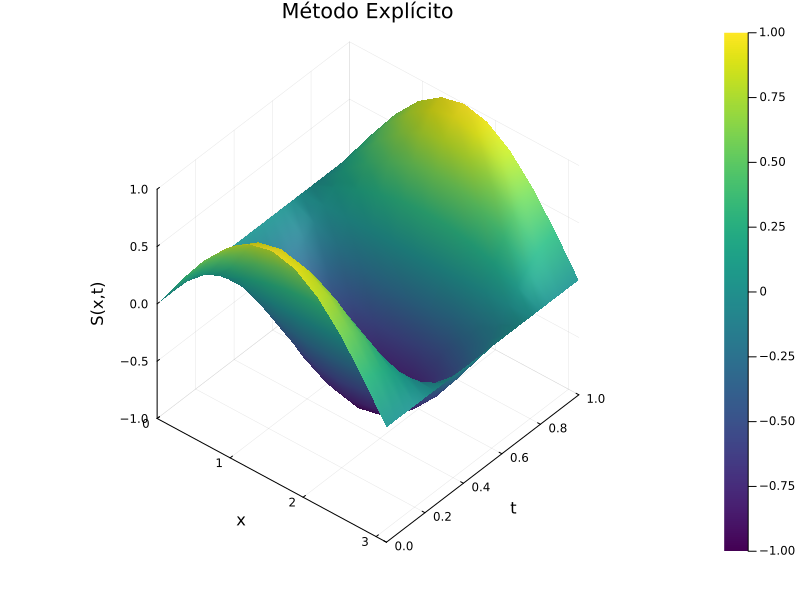

In [20]:
surface(x, t, S, camera=(40,40),size=(800,600), c=:viridis, title="Método Explícito",xlabel="x",ylabel="t",zlabel="S(x,t)")


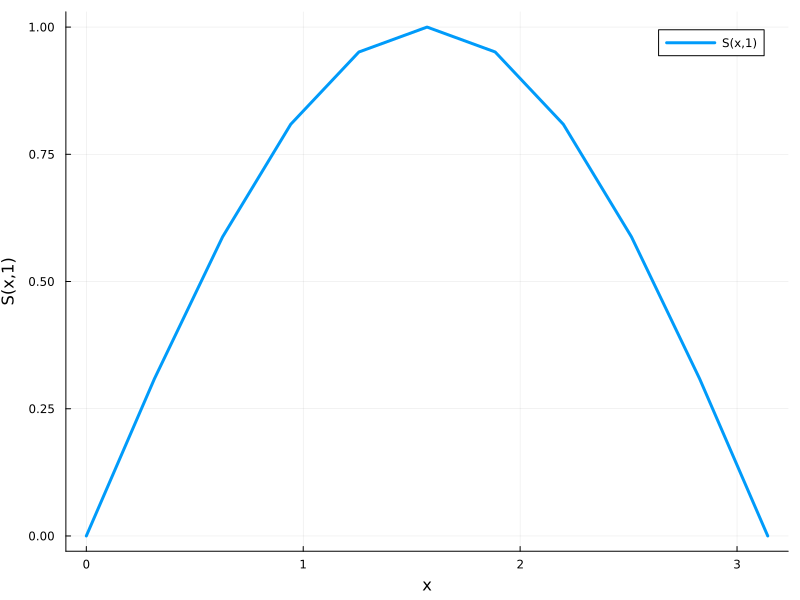

In [21]:
plot(x,S[tn+1,:],label="S(x,$t_max)",xlabel="x",ylabel="S(x,$t_max)",lw=3,size=(800,600))